# <center>Handwritten Digit Classification Using ANN</center>

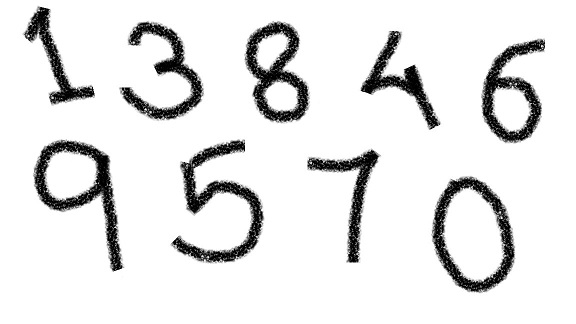

<div style="background-color: black; height: 3px;"></div>


In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

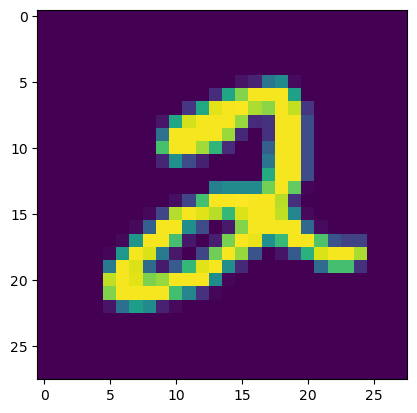

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5])

In [6]:
# Scaling: put values in range from 0 to 1 
X_train=X_train/255
X_test=X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Model Implementation

In [8]:
model=Sequential()

model.add(Flatten(input_shape=(28,28))) # Converting (28 x 28) into 784
model.add(Dense(128,activation='relu')) # Hidden Layer 1
model.add(Dense(10,activation='softmax')) # Output Layer

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
'''
Multi-Class-Classification: loss function is 'sparse_categorical_crossentropy'
'''
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) 

In [11]:
history= model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2849 - accuracy: 0.9182 - val_loss: 0.1630 - val_accuracy: 0.9541
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1282 - accuracy: 0.9609 - val_loss: 0.1134 - val_accuracy: 0.9678
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0878 - accuracy: 0.9741 - val_loss: 0.1026 - val_accuracy: 0.9692
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0645 - accuracy: 0.9808 - val_loss: 0.0960 - val_accuracy: 0.9710
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0488 - accuracy: 0.9855 - val_loss: 0.0885 - val_accuracy: 0.9732
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0376 - accuracy: 0.9885 - val_loss: 0.0866 - val_accuracy: 0.9744
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0295 - accuracy: 0.9911 - val_loss: 0.0850 - val_accuracy:

# Prediction

In [12]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [13]:
y_pred=y_prob.argmax(axis=1)

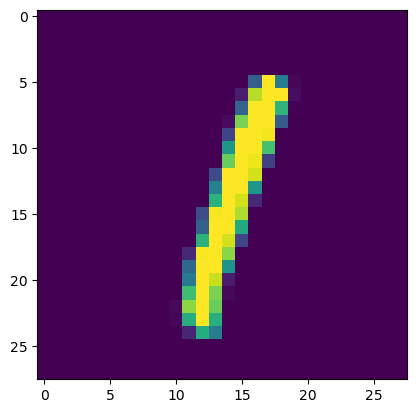

In [14]:
plt.imshow(X_test[5])

In [15]:
model.predict(X_test[5].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 25ms/step


array([1])

# Accuracy Check

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9743

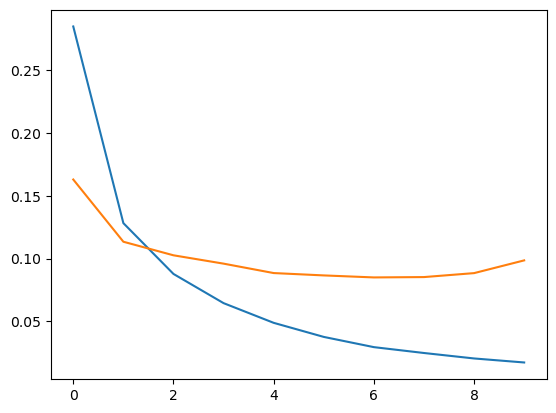

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

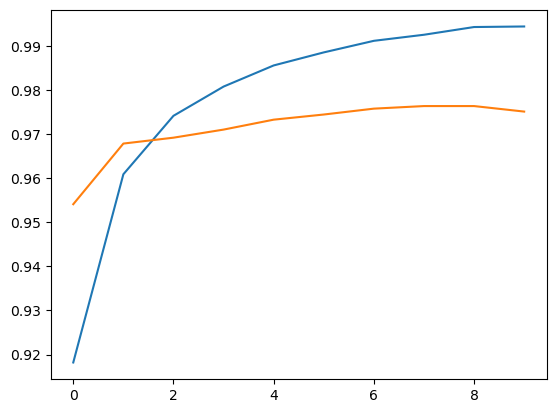

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

<div style="background-color: black; height: 3px;"></div>
